In [65]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [66]:

dataset = 'demo'
path = 'rec1'
save_path = os.path.join("/home/v-mezhang/blob-plm/model/", dataset, path)

In [67]:
policy = 'epsilon_greedy'
paras = [0, 0.1, '1overt']
rewards = {}
opt_rewards = {}

In [68]:
policy_names = ['ucb_0.1', 'ucb_logt'] # 'ucb_0.1'
for para in paras:
    policy_name = policy + '_' + str(para)
    policy_names.append(policy_name)

policy_names

['ucb_0.1',
 'ucb_logt',
 'epsilon_greedy_0',
 'epsilon_greedy_0.1',
 'epsilon_greedy_1overt']

In [69]:
for policy_name in policy_names:
    with open(os.path.join(save_path, (policy_name + "_rewards.pkl")), "rb") as f:
        rewards[policy_name] = pickle.load(f)
    with open(os.path.join(save_path, (policy_name+ "_opt_rewards.pkl")), "rb") as f:
        opt_rewards[policy_name] = pickle.load(f)


In [77]:
cumu_regrets = {}
for para in policy_names:
    num_exper, num_sam = rewards[para].shape
    cumu_regrets[para] = np.zeros((num_exper, num_sam))
    for i in range(num_exper):
        cumu_reward = 0
        cumu_opt_reward = 0

        for j in range(num_sam):
            cumu_reward += rewards[para][i,j]
            cumu_opt_reward += opt_rewards[para][i,j]
            cumu_regrets[para][i,j] = (cumu_opt_reward - cumu_reward) /(j+1)

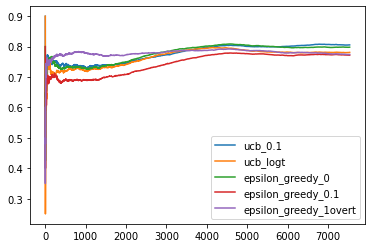

In [78]:
for policy_name, value in cumu_regrets.items():
    plt.plot(range(num_sam), value.mean(axis=0), label = policy_name)
plt.legend()


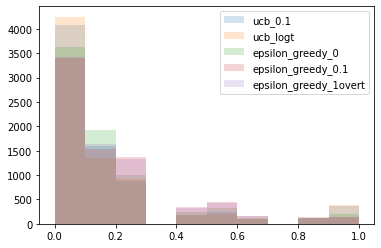

In [72]:
for policy_name, value in rewards.items():
    # if policy_name in ['epsilon_greedy_0', 'epsilon_greedy_0.1']:
    plt.hist(value.mean(axis = 0), label = policy_name, alpha = 0.2)
plt.legend()

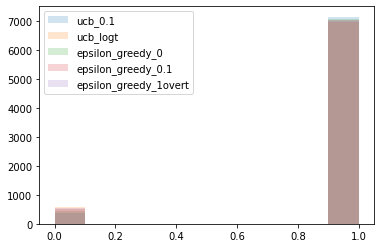

In [73]:
for policy_name, value in opt_rewards.items():
    # if policy_name in ['epsilon_greedy_0', 'epsilon_greedy_0.1']:
    plt.hist(value.mean(axis = 0), label = policy_name, alpha = 0.2)
plt.legend()

In [74]:
np.log(2)

0.6931471805599453